**TF/IDF CLASSWORK-3**

**IMPORTING THE PACKAGES AND CSV FILE**

In [11]:
# Import the pandas library and aliasing it as 'pd' 
import pandas as pd
file=r"C:\Users\HP\Downloads\un-general-debates-blueprint (2).csv"
# Display the first 5 rows of the DataFrame
df.head(5)

,session,year,country,country_name,speaker,position,text,tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,"[may, first, convey, president, congratulation..."
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,"[fortunate, coincidence, precisely, time, unit..."
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,"[pleasure, extend, mr, president, warmest, con..."
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,"[may, begin, expressing, ambassador, hambro, b..."
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...","[doubt, us, coming, rostrum, wonders, usefulne..."


**GETTING THE STOPWORDS**

In [13]:
# Import the Natural Language Toolkit (nltk) library
import nltk 
# Downloading the 'stopwords' dataset from nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'should', 'only', "shouldn't", 'were', 'shouldn', 'up', 'before', 'few', 'ain', 'they', 'its', 'had', 'who', 'aren', 'have', 'do', 'in', 'will', "didn't", 'himself', 'hasn', 'any', 'now', 'no', 'so', 'him', 'needn', 'nor', 'he', 'we', 'because', "wasn't", "couldn't", 'me', 've', 'an', "wouldn't", "you'll", 'is', 'between', "that'll", 'what', 'don', 'than', "mustn't", 'them', 'wasn', 'some', 't', 'yours', 'own', 'below', "hadn't", 'down', 'which', "you'd", 'most', 'haven', "shan't", 'itself', 'o', 'as', 'further', "should've", 'out', 'isn', 'our', 'such', 'until', "mightn't", 'hadn', 'ma', 'the', 'been', 'here', 'these', 'during', 're', 'yourself', 'to', 'am', "you're", 'through', 'where', 'didn', 'very', 'yourselves', 'there', "she's", 'a', 'both', "aren't", 'mightn', 'all', 'his', 'weren', 'll', 'under', "hasn't", 's', 'whom', 'i', 'mustn', 'themselves', "haven't", 'about', 'it', 'into', 'off', 'this', 'other', 'or', 'if', 'has', 'when', 'each', "don't", 'won', 'with', 'against', 'bu

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**PRE-PROCESSING THE PIPE LINE**

In [14]:
# Import the 'regex' module and alias it as 're'
import regex as re
# Function to tokenize text using a regex pattern
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# List of functions to create a processing pipeline
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

**COUNTING THE TOKENS**

In [15]:
#Import the Counter class from the collections module
from collections import Counter
counter = Counter()
# Map the 'update' method of the Counter to each list of tokens in the 'tokens' column of the DataFrame
df['tokens'].map(counter.update)
# Create a DataFrame from the Counter, representing token frequencies
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
# Filter the DataFrame to include only tokens with frequencies greater than or equal to 1
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


**WORDCLOUD OF TERM FREQUENCY**

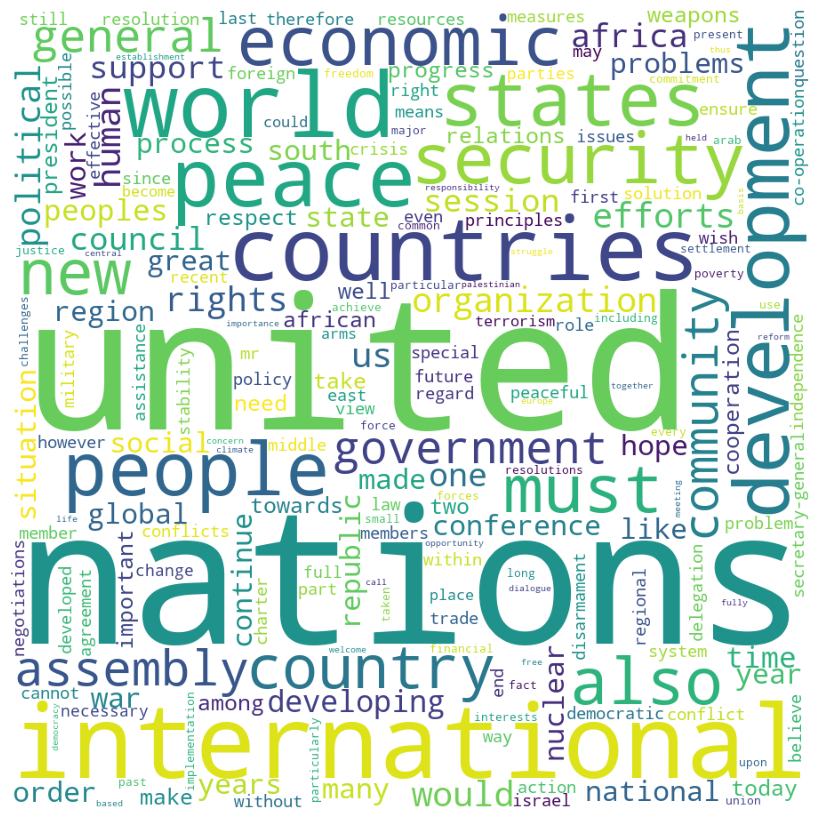

In [16]:
# Import the WordCloud class from the wordcloud module
from wordcloud import WordCloud
from matplotlib import pyplot as plt
# Create a WordCloud object with specified parameters (background color, width, height, margin)
wc = WordCloud(background_color='white', width = 900, height=900, margin=2)
# Fit the WordCloud with the token frequencies from the 'freq_df' DataFrame
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
# Ensure tight layout for aesthetics
plt.tight_layout(pad = 0)
 
plt.show()

**TERM FREQUENCY / INVERSE DOCUMENT FREQUENCY OF AND COMPARISION**


is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus). TF-IDF is commonly used in information retrieval and text mining to identify the importance of words in a document or a set of documents.

In [19]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

**TFIDF = TF * IDF**

In [20]:
# Compute TF-IDF (Term Frequency-Inverse Document Frequency) values
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


**WORDCLOUD OF TEXT FREQUENCY INVERSE DOCUMENT FREQUENCY**

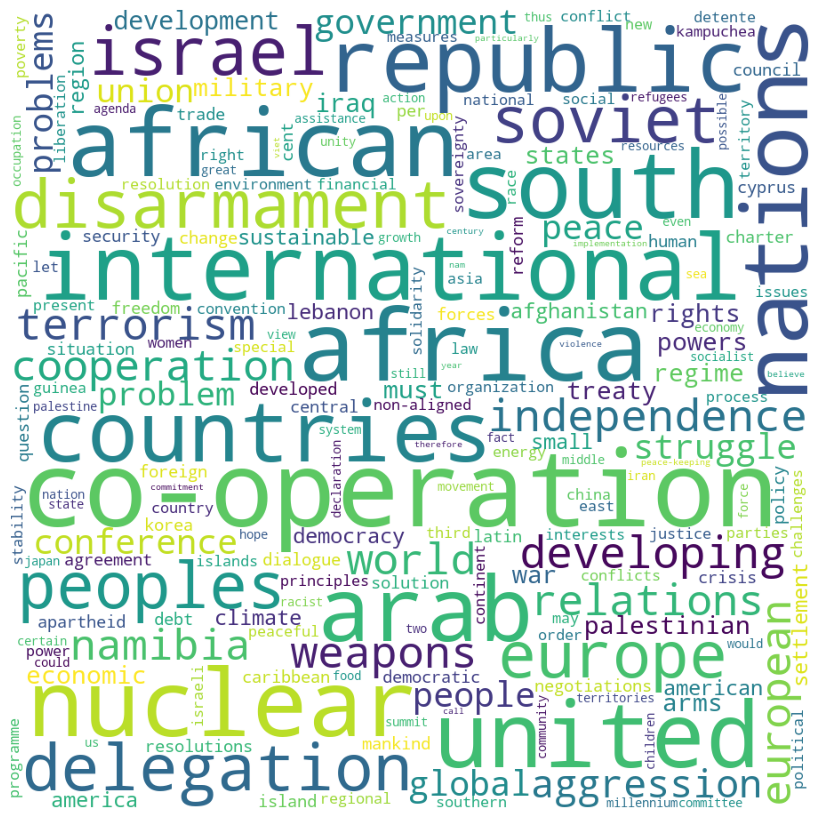

In [21]:
# Create a WordCloud object with specified parameters (background color, width, height, margin)
wc = WordCloud(background_color='white', width = 900, height=900, margin=2)
# Fit the WordCloud with TF-IDF values from the 'tfidf' column of the 'freq_df' DataFrame
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


**TERM FREQUENCY VS TFIDF**

**COMPARING 1970 TF AND 1970 TFIDF**

In [24]:
#Filter the DataFrame to include only rows where the 'year' column is equal to 1970
import pandas as pd
file =r"C:\Users\HP\Downloads\un-general-debates-blueprint (2).csv"
df = pd.read_csv(file)
df= df[df['year']==1970]
df.head(5)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


**GETTING THE STOPWORDS**

In [25]:
# Download the 'stopwords' dataset from nltk, which contains common English stopwords
import nltk 
nltk.download('stopwords')
# Create a set of English stopwords using the nltk corpus
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'should', 'only', "shouldn't", 'were', 'shouldn', 'up', 'before', 'few', 'ain', 'they', 'its', 'had', 'who', 'aren', 'have', 'do', 'in', 'will', "didn't", 'himself', 'hasn', 'any', 'now', 'no', 'so', 'him', 'needn', 'nor', 'he', 'we', 'because', "wasn't", "couldn't", 'me', 've', 'an', "wouldn't", "you'll", 'is', 'between', "that'll", 'what', 'don', 'than', "mustn't", 'them', 'wasn', 'some', 't', 'yours', 'own', 'below', "hadn't", 'down', 'which', "you'd", 'most', 'haven', "shan't", 'itself', 'o', 'as', 'further', "should've", 'out', 'isn', 'our', 'such', 'until', "mightn't", 'hadn', 'ma', 'the', 'been', 'here', 'these', 'during', 're', 'yourself', 'to', 'am', "you're", 'through', 'where', 'didn', 'very', 'yourselves', 'there', "she's", 'a', 'both', "aren't", 'mightn', 'all', 'his', 'weren', 'll', 'under', "hasn't", 's', 'whom', 'i', 'mustn', 'themselves', "haven't", 'about', 'it', 'into', 'off', 'this', 'other', 'or', 'if', 'has', 'when', 'each', "don't", 'won', 'with', 'against', 'bu

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**PRE-PROCESSING THE PIPE LINE**

In [26]:
# Import the 'regex' module and alias it as 're'
import regex as re
# Function to tokenize text using a regex pattern
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
# Function to remove stopwords from a list of tokens
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

# Function to prepare text by applying a processing pipeline
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
# Apply the 'prepare' function to the 'text' column of the DataFrame and create a new 'tokens' column
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

**COUNTING THE TOKENS**

In [27]:
# Import the Counter class from the collections module
from collections import Counter
# Initialize a Counter object to count token frequencies
counter = Counter()
# Map the 'update' method of the Counter to each list of tokens in the 'tokens' column of the DataFrame
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,1997
united,1996
international,1251
world,1093
peace,970
countries,908
states,896
organization,762
would,677



**TOKEN LENGTH AND KEYWORD COUNTING IN DATAFRAME**

In [47]:
# Add a new column 'num_tokens' to the DataFrame, representing the number of tokens in each document
df['num_tokens'] = df['tokens'].map(len)

# Function to count the occurrences of specified keywords in a list of tokens
def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

**WORDCLOUD OF TEXT FREQUENCY**

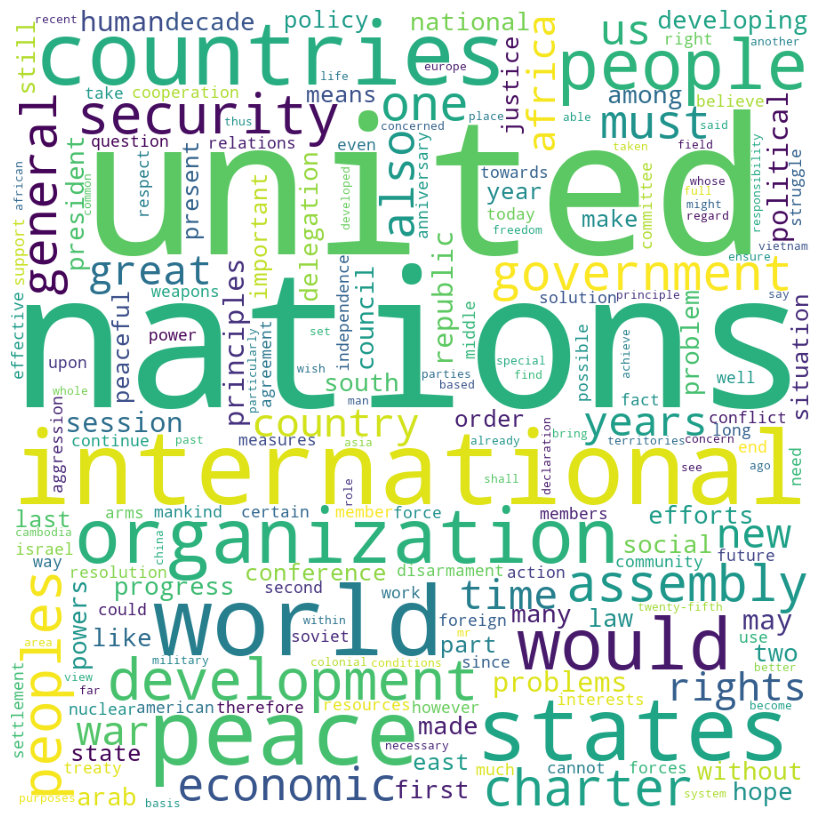

In [48]:
# Import necessary modules for creating the word cloud and plotting
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 900, height=900, margin=2)
# Fit the WordCloud with token frequencies converted to a dictionary
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
# Display the WordCloud using imshow
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**TERM FREQUENCY / INVERSE DOCUMENT FREQUENCY OF AND COMPARISION**

In [49]:
#importing numpy
import numpy as np
# Function to compute inverse document frequency (IDF)
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    # Compute IDF values using the formula: log(total number of documents / document frequency) + 0.1
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

**TFIDF = TF * IDF**

In [50]:
# Compute TF-IDF (Term Frequency-Inverse Document Frequency) scores
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,1997,199.7
united,1996,199.6
international,1251,125.1
world,1093,109.3
peace,970,97.0


**WORDCLOUD OF TEXT FREQUENCY INVERSE DOCUMENT FREQUENCY**

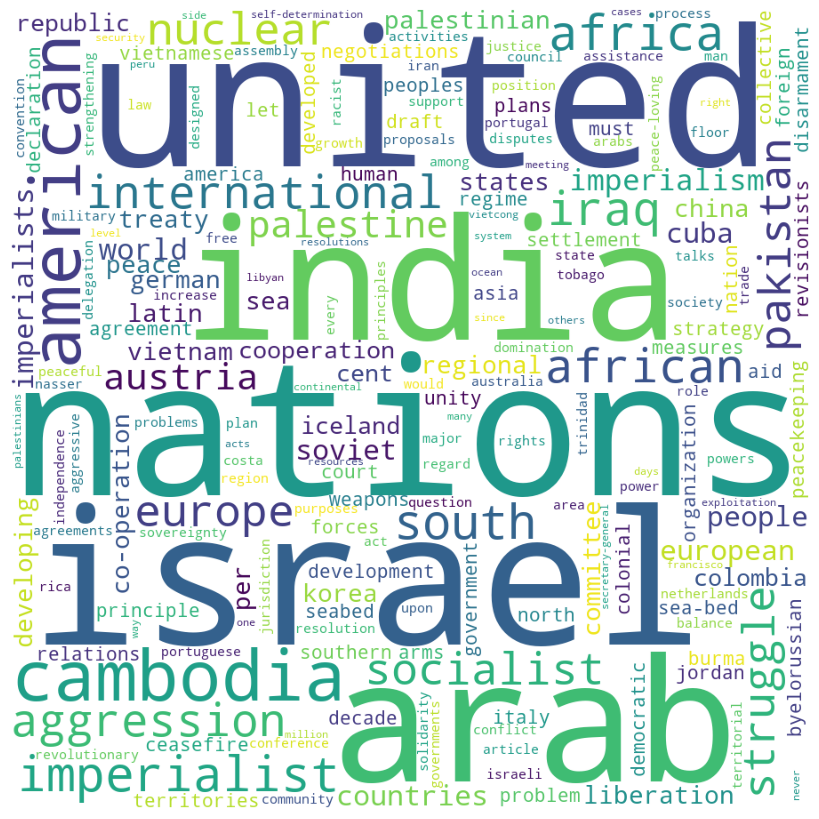

In [51]:
# Create a WordCloud object with specified parameters (background color, width, height, margin)
wc = WordCloud(background_color='white', width = 900, height=900, margin=2)
# Fit the WordCloud with TF-IDF values converted to a dictionary
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
# Turn off axis labels
plt.axis("off")
plt.tight_layout(pad = 0)
 
# Show the WordCloud plot
plt.show()

**COUNTING KEYWORDS BY GROUP IN DATAFRAME**

In [52]:
# Function to count occurrences of specified keywords by group in a DataFrame
def count_keywords_by(df, by, keywords, column='tokens'):
    # Reset the index of the DataFrame to handle gaps in the supplied index
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    # Group by the specified column(s) and sum the counts, then sort the values
    return freq_df.groupby(by=by).sum().sort_values(by)

**HEATMAP VISUALISATION OF RELATIVE FREQUENCIES OF KEYWORDS OVER YEARS**

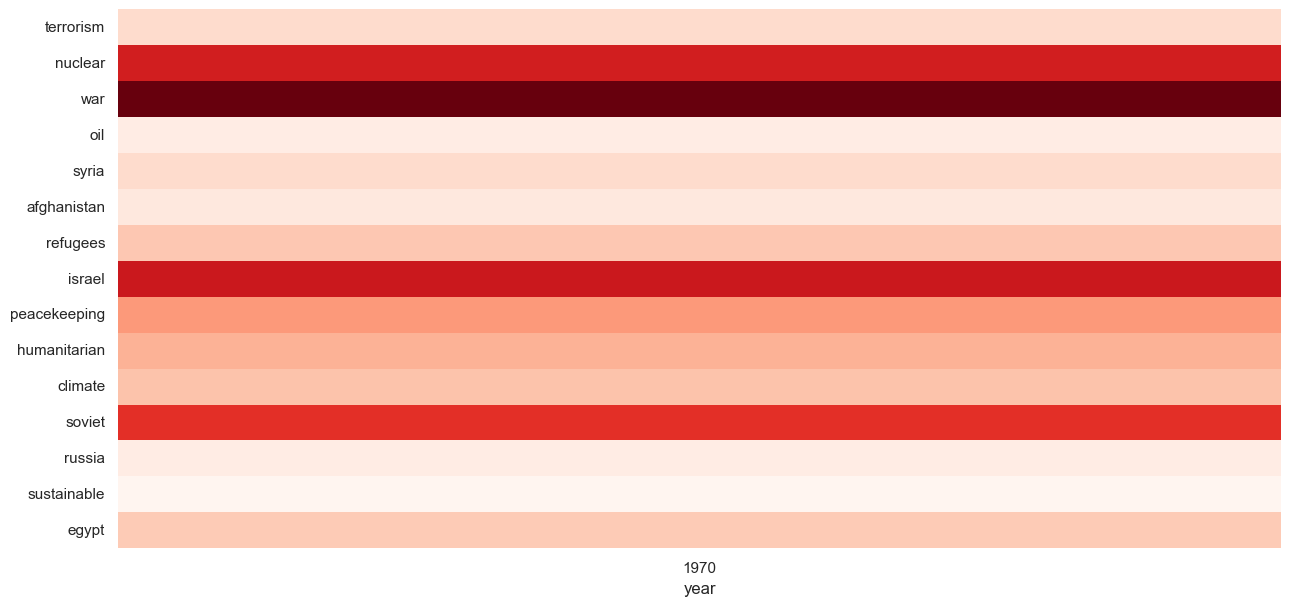

In [53]:
# Import the seaborn library and alias it as 'sns'
import seaborn as sns
# Specify a list of keywords for analysis
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)